In [ ]:
import numpy as np
from scipy import sparse
import operator
import matplotlib.pyplot as plt

# Import the sparse function defined in pageRank.py
from HW1.pageRank import calculate_pagerank

In [3]:
print("=============================================")
print("                 EXERCISE 1")
print("=============================================")

# ---------------------------------------------------------
# 1. Original Situation (4 Pages)
# ---------------------------------------------------------
print("\n--- 1. Original Situation (4 Pages) ---")

A_orig_dense = np.array([
    [0.0, 0.0, 1.0, 0.5],  
    [1/3, 0.0, 0.0, 0.0],  
    [1/3, 0.5, 0.0, 0.5],  
    [1/3, 0.5, 0.0, 0.0]   
])

# Convert to sparse and calculate
# We pass [] as dangling_indices because this matrix is strictly column-stochastic (cols sum to 1)
A_orig_sparse = sparse.csr_matrix(A_orig_dense)
scores_orig, iters_orig = calculate_pagerank(A_orig_sparse,4,False,m=0.0)

# Print Original Results
indices_orig = np.arange(1, 5)
results_orig = list(zip(indices_orig, scores_orig))
results_orig_sorted = sorted(results_orig, key=operator.itemgetter(1), reverse=True)

print("Original Ranking:")
for page_id, score in results_orig_sorted:
    print(f"Page {page_id}: {score:.4f}")

print(f"Calculation completed in {iters_orig} iterations.")

# FIX: Access as 1D array
p1_score_orig = scores_orig[0]
p3_score_orig = scores_orig[2]


# ---------------------------------------------------------
# 2. Modified Situation (5 Pages)
# ---------------------------------------------------------
print("\n--- 2. Modified Situation (5 Pages) ---")
print("Modification: Added Page 5. Links: 3->5 and 5->3.")

# Modified A Matrix (5x5)
A_mod_dense = np.array([
    [0.0, 0.0, 0.5, 0.5, 0.0],  
    [1/3, 0.0, 0.0, 0.0, 0.0],  
    [1/3, 0.5, 0.0, 0.5, 1.0],  
    [1/3, 0.5, 0.0, 0.0, 0.0],  
    [0.0, 0.0, 0.5, 0.0, 0.0]   
])

A_mod_sparse = sparse.csr_matrix(A_mod_dense)
scores_mod, iters_mod = calculate_pagerank(A_mod_sparse,5,False,m=0.0)

# Print Modified Results
indices_mod = np.arange(1, 6)
results_mod = list(zip(indices_mod, scores_mod))
results_mod_sorted = sorted(results_mod, key=operator.itemgetter(1), reverse=True)


for page_id, score in results_mod_sorted:
    print(f"Page {page_id}: {score:.4f}")

print(f"Calculation completed in {iters_mod} iterations.")

# FIX: Access as 1D array
p1_score_mod = scores_mod[0]
p3_score_mod = scores_mod[2]

# ---------------------------------------------------------
# FINAL CHECK
# ---------------------------------------------------------
print("\n=============================================")
print("               RESULTS CHECK")
print("=============================================")
print(f"BEFORE: Page 1 ({p1_score_orig:.4f}) vs Page 3 ({p3_score_orig:.4f})")
print(f"AFTER:  Page 1 ({p1_score_mod:.4f}) vs Page 3 ({p3_score_mod:.4f})")

if p3_score_mod > p1_score_mod:
    print("\nANSWER: YES. The strategy worked.")
else:
    print("\nANSWER: NO.")

                 EXERCISE 1

--- 1. Original Situation (4 Pages) ---
Original Ranking:
Page 1: 0.3871
Page 3: 0.2903
Page 4: 0.1935
Page 2: 0.1290
Calculation completed in 27 iterations.

--- 2. Modified Situation (5 Pages) ---
Modification: Added Page 5. Links: 3->5 and 5->3.
Page 3: 0.3673
Page 1: 0.2449
Page 5: 0.1837
Page 4: 0.1224
Page 2: 0.0816
Calculation completed in 49 iterations.

               RESULTS CHECK
BEFORE: Page 1 (0.3871) vs Page 3 (0.2903)
AFTER:  Page 1 (0.2449) vs Page 3 (0.3673)

ANSWER: YES. The strategy worked.


In [4]:
print("=============================================")
print("                 EXERCISE 4")
print("=============================================")

# Coefficients of the characteristic polynomial: 12*x^3 + 0*x^2 - 2*x - 1 = 0
# Order: [x^3, x^2, x^1, x^0]
coeffs = [12, 0, -2, -1]

# Compute the roots of the polynomial
roots = np.roots(coeffs)

real_components = roots.real 

print("All roots found:")
print(real_components)

real_roots_mask = np.isreal(roots) 
pure_real_roots = roots[real_roots_mask].real

# Filter to extract only the positive real root (The Perron Eigenvalue)
perron_lambda = pure_real_roots[pure_real_roots > 0][0]

print(f"The Perron eigenvalue (positive real) is: {perron_lambda:.5f}")

                 EXERCISE 4
All roots found:
[ 0.56135324 -0.28067662 -0.28067662]
The Perron eigenvalue (positive real) is: 0.56135


In [11]:
print("=============================================")
print(" EXERCISE 11: PAGERANK CALCULATION ON MODIFIED NETWORK")
print(" (Eigenvector of M with m=0.15)")
print("=============================================")

A_ex11_dense = np.array([
    [0.0, 0.0, 0.5, 0.5, 0.0],  
    [1/3, 0.0, 0.0, 0.0, 0.0],  
    [1/3, 0.5, 0.0, 0.5, 1.0],  
    [1/3, 0.5, 0.0, 0.0, 0.0],  
    [0.0, 0.0, 0.5, 0.0, 0.0]   
])

A_ex11_sparse = sparse.csr_matrix(A_ex11_dense)
scores_ex11, iters_ex11 = calculate_pagerank(A_ex11_sparse, 5, False, m=0.15)

print(f"\nCalculation converged in {iters_ex11} iterations.")
print("Final Ranking (Normalized Eigenvector):")

indices_ex11 = np.arange(1, 6)
results_ex11 = list(zip(indices_ex11, scores_ex11))
results_ex11_sorted = sorted(results_ex11, key=operator.itemgetter(1), reverse=True)

for page_id, score in results_ex11_sorted:
    print(f"Page {page_id}: {score:.4f}")

p1 = scores_ex11[0]
p3 = scores_ex11[2]
print(f"\nKey Comparison:")
print(f"Page 3 ({p3:.4f}) > Page 1 ({p1:.4f})?")
print("YES" if p3 > p1 else "NO")

 EXERCISE 11: PAGERANK CALCULATION ON MODIFIED NETWORK
 (Eigenvector of M with m=0.15)

Calculation converged in 33 iterations.
Final Ranking (Normalized Eigenvector):
Page 3: 0.3489
Page 1: 0.2371
Page 5: 0.1783
Page 4: 0.1385
Page 2: 0.0972

Key Comparison:
Page 3 (0.3489) > Page 1 (0.2371)?
YES


In [6]:
print("=============================================")
print(" EXERCISE 12: PAGE WITHOUT BACKLINKS")
print("=============================================")

A_ex12_dense = np.array([
    [0.0, 0.0, 0.5, 0.5, 0.0, 0.2], 
    [1/3, 0.0, 0.0, 0.0, 0.0, 0.2], 
    [1/3, 0.5, 0.0, 0.5, 1.0, 0.2], 
    [1/3, 0.5, 0.0, 0.0, 0.0, 0.2], 
    [0.0, 0.0, 0.5, 0.0, 0.0, 0.2], 
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]  # Row Pg 6 (No backlinks -> Backlinks = 0)
])

# FIX: Convert to sparse
A_ex12_sparse = sparse.csr_matrix(A_ex12_dense)

# ---------------------------------------------------------
# CALCULATION 1: USING ONLY A (m=0.0)
# ---------------------------------------------------------
print("\n--- CASE A: Ranking with m=0.0 (Only Link) ---")
# FIX: Use sparse function
scores_A, iters_A = calculate_pagerank(A_ex12_sparse, 6, False, m=0.0, max_iter=1000)

results_A = list(zip(np.arange(1, 7), scores_A))
results_A_sorted = sorted(results_A, key=operator.itemgetter(1), reverse=True)

for page_id, score in results_A_sorted:
    print(f"Page {page_id}: {score:.4f}")

# ---------------------------------------------------------
# CALCULATION 2: USING M (m=0.15)
# ---------------------------------------------------------
print("\n--- CASE B: Ranking with m=0.15 (Google Model) ---")
# FIX: Use sparse function
scores_M, iters_M = calculate_pagerank(A_ex12_sparse, 6, False, m=0.15)

results_M = list(zip(np.arange(1, 7), scores_M))
results_M_sorted = sorted(results_M, key=operator.itemgetter(1), reverse=True)

for page_id, score in results_M_sorted:
    print(f"Page {page_id}: {score:.4f}")

# ---------------------------------------------------------
# CHECK PAGE 6
# ---------------------------------------------------------
print("\nCheck Page 6 (No Backlink):")
# FIX: Access as 1D array
print(f"With m=0.00 -> Score: {scores_A[5]:.6f} (Should be 0)")
print(f"With m=0.15 -> Score: {scores_M[5]:.6f} (Minimum guaranteed = 0.15/6 = 0.025)")

 EXERCISE 12: PAGE WITHOUT BACKLINKS

--- CASE A: Ranking with m=0.0 (Only Link) ---
Page 3: 0.3673
Page 1: 0.2449
Page 5: 0.1837
Page 4: 0.1224
Page 2: 0.0816
Page 6: 0.0000

--- CASE B: Ranking with m=0.15 (Google Model) ---
Page 3: 0.3402
Page 1: 0.2312
Page 5: 0.1738
Page 4: 0.1350
Page 2: 0.0948
Page 6: 0.0250

Check Page 6 (No Backlink):
With m=0.00 -> Score: 0.000000 (Should be 0)
With m=0.15 -> Score: 0.025000 (Minimum guaranteed = 0.15/6 = 0.025)


In [7]:
print("=============================================")
print(" EXERCISE 13: DISCONNECTED SUBNETWORKS")
print("=============================================")

# ---------------------------------------------------------
# CONSTRUCTION OF THE MATRIX
# ---------------------------------------------------------
A_ex13_dense = np.array([
    [0.0, 1.0,   0.0, 0.0, 0.0], 
    [1.0, 0.0,   0.0, 0.0, 0.0], 
    [0.0, 0.0,   0.0, 1.0, 1.0], 
    [0.0, 0.0,   0.5, 0.0, 0.0], 
    [0.0, 0.0,   0.5, 0.0, 0.0]  
])

print("Matrix A (5x5) constructed with two disconnected components.")
print("Group A: Pages 1-2")
print("Group B: Pages 3-4-5")

# FIX: Sparse conversion
A_ex13_sparse = sparse.csr_matrix(A_ex13_dense)

# ---------------------------------------------------------
# CALCULATION
# ---------------------------------------------------------
print("\n--- Ranking Calculation (m=0.15) ---")
# FIX: Use sparse function
scores_13, iters_13 = calculate_pagerank(A_ex13_sparse, 5, False, m=0.15)

results_13 = list(zip(np.arange(1, 6), scores_13))
results_13_sorted = sorted(results_13, key=operator.itemgetter(1), reverse=True)

for page_id, score in results_13_sorted:
    group = "Gruppo A" if page_id <= 2 else "Gruppo B"
    print(f"Pagina {page_id} ({group}): {score:.4f}")

# ---------------------------------------------------------
# ANALYSIS OF THE SUM BY GROUPS
# ---------------------------------------------------------
sum_group_A = np.sum(scores_13[0:2])
sum_group_B = np.sum(scores_13[2:5])

print("\n--- Probability Distribution Analysis ---")
print(f"Total Probability Group A (2 pages): {sum_group_A:.4f}")
print(f"Total Probability Group B (3 pages): {sum_group_B:.4f}")
print(f"Approximate Expected Ratio (2/5 vs 3/5):")
print(f"A: {2/5:.4f}, B: {3/5:.4f}")

 EXERCISE 13: DISCONNECTED SUBNETWORKS
Matrix A (5x5) constructed with two disconnected components.
Group A: Pages 1-2
Group B: Pages 3-4-5

--- Ranking Calculation (m=0.15) ---
Pagina 3 (Gruppo B): 0.2919
Pagina 1 (Gruppo A): 0.2000
Pagina 2 (Gruppo A): 0.2000
Pagina 4 (Gruppo B): 0.1541
Pagina 5 (Gruppo B): 0.1541

--- Probability Distribution Analysis ---
Total Probability Group A (2 pages): 0.4000
Total Probability Group B (3 pages): 0.6000
Approximate Expected Ratio (2/5 vs 3/5):
A: 0.4000, B: 0.6000


In [8]:
# 1. CONSTRUCTION OF THE GOOGLE MATRIX M (Formula 3.1 of the paper)
# Normalized adjacency matrix A (Exercise 11)
A = np.array([
    [0.0, 0.0, 0.5, 0.5, 0.0], 
    [1/3, 0.0, 0.0, 0.0, 0.0], 
    [1/3, 0.5, 0.0, 0.5, 1.0], 
    [1/3, 0.5, 0.0, 0.0, 0.0], 
    [0.0, 0.0, 0.5, 0.0, 0.0]  
])

# Parameters from the paper
m = 0.15          # Teleportation probability
N = 5             # Web size
S = np.full((N, N), 1/N) # Uniform teleportation matrix

# Formula (3.1): M = (1-m)A + mS
M = (1 - m) * A + m * S

# 2. CALCULATION OF THE EXACT STATIONARY STATE (q)
# Calculated using eigenvectors to have a reference for the error
eigenvalues, eigenvectors = np.linalg.eig(M)
idx_q = np.argmin(np.abs(eigenvalues - 1.0))
q = np.real(eigenvectors[:, idx_q])
q = q / np.sum(q) # Normalization (Sum = 1)
q = q.reshape(-1, 1)

# 3. APPLICATION OF THE POWER METHOD (x_k = M * x_k-1)
# Initial probability vector x0 (All mass on Page 1)
x = np.array([[1.0], [0.0], [0.0], [0.0], [0.0]])

print(f"{'Iter (k)':<10} | {'L1 Error (e_k)':<20} | {'Ratio (e_k/e_k-1)':<20}")
print("-" * 60)

prev_error = np.sum(np.abs(x - q))

for k in range(1, 51):
    x = M @ x  # Random Surfer iterative step
    curr_error = np.sum(np.abs(x - q))
    ratio = curr_error / prev_error
    
    # Print the checkpoints required by the paper
    if k in [1, 5, 10, 50]:
        print(f"{k:<10} | {curr_error:<20.10f} | {ratio:<20.10f}")
    
    prev_error = curr_error

# 4. CALCULATION OF THE THEORETICAL PARAMETERS FROM THE PAPER
# Ergodicity Coefficient c(M)
# Formula: max_j | 1 - 2 * min_i M_ij |
min_entries_per_column = np.min(M, axis=0)
c_M = np.max(np.abs(1 - 2 * min_entries_per_column))

# Second Dominant Eigenvalue |lambda_2|
abs_eigenvalues = np.sort(np.abs(eigenvalues))[::-1]
lambda_2 = abs_eigenvalues[1]

print("-" * 60)
print(f"THEORETICAL RESULTS:")
print(f"Second Dominant Eigenvalue |lambda_2|:   {lambda_2:.6f}")
print(f"Ergodicity Coefficient c(M):  {c_M:.6f}")
print(f"\nCheck Proposition 4: |lambda_2| <= c(M) is {lambda_2 <= c_M}")
print(f"Check Convergence: Final ratio ({ratio:.4f}) tends to |lambda_2| ({lambda_2:.4f})")

Iter (k)   | L1 Error (e_k)       | Ratio (e_k/e_k-1)   
------------------------------------------------------------
1          | 0.7819626529         | 0.5125208082        
5          | 0.0068714107         | 0.3227085474        
10         | 0.0003043717         | 0.5245287480        
50         | 0.0000000000         | 0.6114691824        
------------------------------------------------------------
THEORETICAL RESULTS:
Second Dominant Eigenvalue |lambda_2|:   0.611269
Ergodicity Coefficient c(M):  0.940000

Check Proposition 4: |lambda_2| <= c(M) is True
Check Convergence: Final ratio (0.6115) tends to |lambda_2| (0.6113)


Second eigenvalue |lambda_2|: 0.6113
Theoretical limit (1-m):    0.8500
Error at iteration 50:      7.44e-13


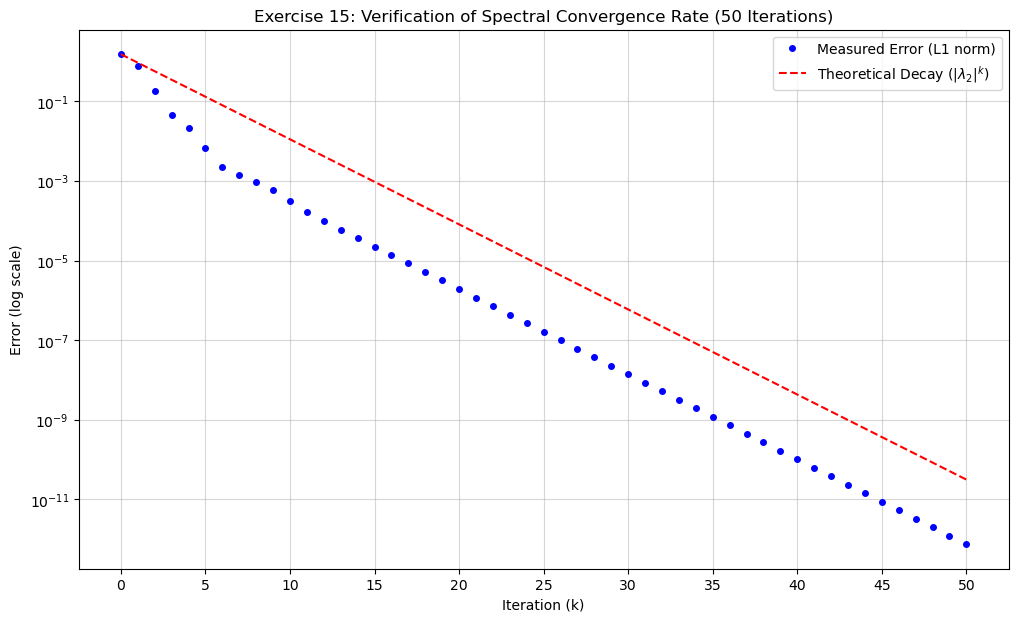

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# 1. SETUP 
A = np.array([
    [0.0, 0.0, 0.5, 0.5, 0.0], 
    [1/3, 0.0, 0.0, 0.0, 0.0], 
    [1/3, 0.5, 0.0, 0.5, 1.0], 
    [1/3, 0.5, 0.0, 0.0, 0.0], 
    [0.0, 0.0, 0.5, 0.0, 0.0]  
])
m = 0.15
N = 5
M = (1 - m) * A + m * np.full((N, N), 1/N)

# 2. CALCULATION OF EIGENVALUES AND STATIONARY STATE
eigenvalues, eigenvectors = np.linalg.eig(M)

# Sort eigenvalues by magnitude
abs_ev = np.sort(np.abs(eigenvalues))[::-1]
lambda_1 = abs_ev[0] # Should be 1.0
lambda_2 = abs_ev[1] # The second eigenvalue

# q is the eigenvector corresponding to lambda_1
idx_q = np.argmin(np.abs(eigenvalues - 1.0))
q = np.real(eigenvectors[:, idx_q])
q = (q / np.sum(q)).reshape(-1, 1)

# 3. POWER METHOD SIMULATION AND ERROR COLLECTION (Up to 50 iterations)
x = np.array([[1.0], [0.0], [0.0], [0.0], [0.0]])
errors = []
theoretical_decay = []

# Range esteso a 51 per includere l'iterazione 50
steps = range(51) 
initial_error = np.sum(np.abs(x - q))

for k in steps:
    curr_error = np.sum(np.abs(x - q))
    errors.append(curr_error)

    # Theoretical formula: e_k = e_0 * (lambda_2^k)
    theoretical_decay.append(initial_error * (lambda_2**k))

    x = M @ x

# 4. PLOT OF RESULTS
plt.figure(figsize=(12, 7))
plt.semilogy(steps, errors, 'ob', markersize=4, label='Measured Error (L1 norm)')
plt.semilogy(steps, theoretical_decay, 'r--', label=f'Theoretical Decay ($|\lambda_2|^k$)')

# --- CORREZIONE ASSE X ---
# Forza l'asse X a mostrare solo interi, con un intervallo di 5
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xticks(np.arange(0, 51, 5)) 

plt.title('Exercise 15: Verification of Spectral Convergence Rate (50 Iterations)')
plt.xlabel('Iteration (k)')
plt.ylabel('Error (log scale)')
plt.grid(True, which="both", ls="-", alpha=0.5)
plt.legend()

print(f"Second eigenvalue |lambda_2|: {lambda_2:.4f}")
print(f"Theoretical limit (1-m):    {1-m:.4f}")
print(f"Error at iteration 50:      {errors[-1]:.2e}")

plt.show()